In [2]:
#import librarries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


# normal equation
def normal_equation(y, X):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

No handles with labels found to put in legend.


(100, 1) (100, 1) (1,)


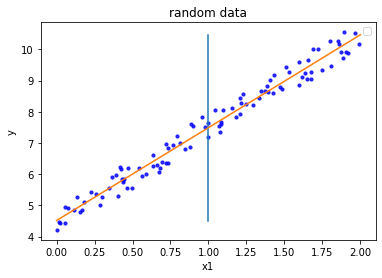

In [11]:
# generate a one direction random data (easy of visualisation)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
theta = np.random.rand(1)

print(X.shape, y.shape, theta.shape)

yhat = X.dot(theta.T)

t_n = normal_equation(y, np.c_[np.ones((100,1)), X]) #add x0 = 1 for the intercept
X_new = np.c_[np.ones((2,1)), np.array([[0],[2]])]
y_new = X_new.dot(t_n)

fig, ax = plt.subplots(1, 1)
ax.scatter(X, y, c = 'b', s = 10, alpha = 0.8)
ax.plot(X_new, y_new)
ax.set_title("random data")
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()


In [21]:
# MSE cost function (root mean square error)
# typically used as error function for regression models
# the goal is to minimize the error function by finding tbe best
# thetas
def MSE(X, Theta, y):
    y_hat = X.dot(Theta)
    MSE = np.sum(np.square(y_hat - y))
    return MSE

# vectorised version of partial differential equation 
def d_MSE(X_b, theta, y):    
    return 2 / len(X) * X_b.T.dot(X_b.dot(theta) - y)

#MSE(y, X, theta)
#d_MSE(y, X, theta)

## Sklearn linear regression

The computational complexity is typically (X^2.3) for normal equation, which is why we normally use GD to minimise cost function.

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51328836]), array([[2.97659527]]))

In [14]:
np.c_[lin_reg.intercept_, lin_reg.coef_].T

array([[4.51328836],
       [2.97659527]])

In [15]:
t_n

array([[4.51328836],
       [2.97659527]])

## Gradient Descent

### Batch Gradient Descent
Compute gradients for the whole batch', adjusting theta by minus it against the partial derivative of it with a leanring rate multiplier. The higher the rate the fast, but may result in overshooting. The lower the rate the slower, but may stuck.


### Stochastic Gradient Descent
Picks a random instance of the training set at every step and compute gradients at the step. This is fast due to size for each step, and makes it possible for training large datasets.  However, less regular due to the random nature and cost may go up and down. 

In [41]:
# Provide a learning rate, goes for number of iterations with an randomised
# theta. The hope is to find local minimal.
def gradient_descent(learn_rate, n_iter, X, theta, y):    
    for i in range(n_iter):        
        gradients = d_MSE(X, theta, y)
        theta = theta - learn_rate * gradients
        cost = MSE(X, theta, y)
        if i % 10 == 0:
            print(f"{i}, {cost}")
    print(f"{i} iterations used")
    return theta


# stochastic Gradient Descent
# initial hyper parameter to adjust to ensure no zero division and reduce learning rate when epoch is higher
def SGD(learn_rate, n_epochs, X, theta, y, t0 = 5, t1 = 50):    
    
    m = len(X)
    for epoch in range(n_epochs):
        for i in range(m):        
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            
            gradients = d_MSE(xi, theta, yi)
            
            learning_rate = t0 / (epoch * m + i + t1)
            theta = theta - learn_rate * gradients
            cost = MSE(X, theta, y)
            
        if epoch % 10 == 0:
            print(f"{i}, {cost}")                
    return theta



X_b = np.c_[np.ones((100, 1)), X]
theta = np.random.rand(2, 1)
#gradient_descent(0.1, 100, X_b, theta, y)
SGD(0.1, 100, X_b, theta, y)

99, 2253.2109869978617
99, 21.64096513327243
99, 15.089301750474267
99, 11.514092630632417
99, 9.59159611069724
99, 8.659204427495203
99, 8.148610536346364
99, 7.860722086604116
99, 7.6989555684493745
99, 7.628902456071888


array([[4.47326666],
       [3.02363387]])

In [95]:
X_b.T.dot(X_b.dot(theta) - y)

array([[-629.89536805],
       [-707.04606277]])

In [10]:
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])